<a href="https://colab.research.google.com/github/SaloniSukirti/CelebalInternship/blob/main/SaloniSukirti_CelebalInternship3CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch

PyTorch is a machine learning framework based on the Torch library, used for applications such as computer vision and natural language processing, originally developed by Meta AI and now part of the Linux Foundation umbrella.

Torch was originally a ML library based on the Lua
programming language first released in 2002


PyTorch provides two high-level features:
Tensor computing (like NumPy) with strong acceleration via graphics processing units (GPU)
Deep neural networks built on a tape-based automatic differentiation system.

# Neural Network


A traditional neural network, also known as a feedforward neural network or multilayer perceptron (MLP), is a type of artificial neural network that consists of an input layer, one or more hidden layers, and an output layer.



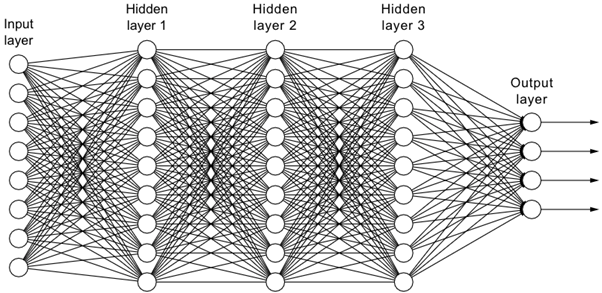

# Kernel Convolutions

Kernel convolutional refers to the operation of convolving an input image or data with a kernel in a convolutional neural network (CNN). In CNNs, convolutional layers are responsible for extracting local patterns and features from the input data by applying a set of learnable filters, also known as kernels or convolutional filters.
So by using different numbers, we can form blurs, edge detection, sharpen etc.

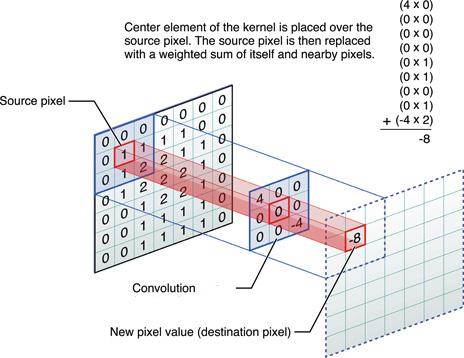

CNN's combine traditional neural networks
and the convolutions.


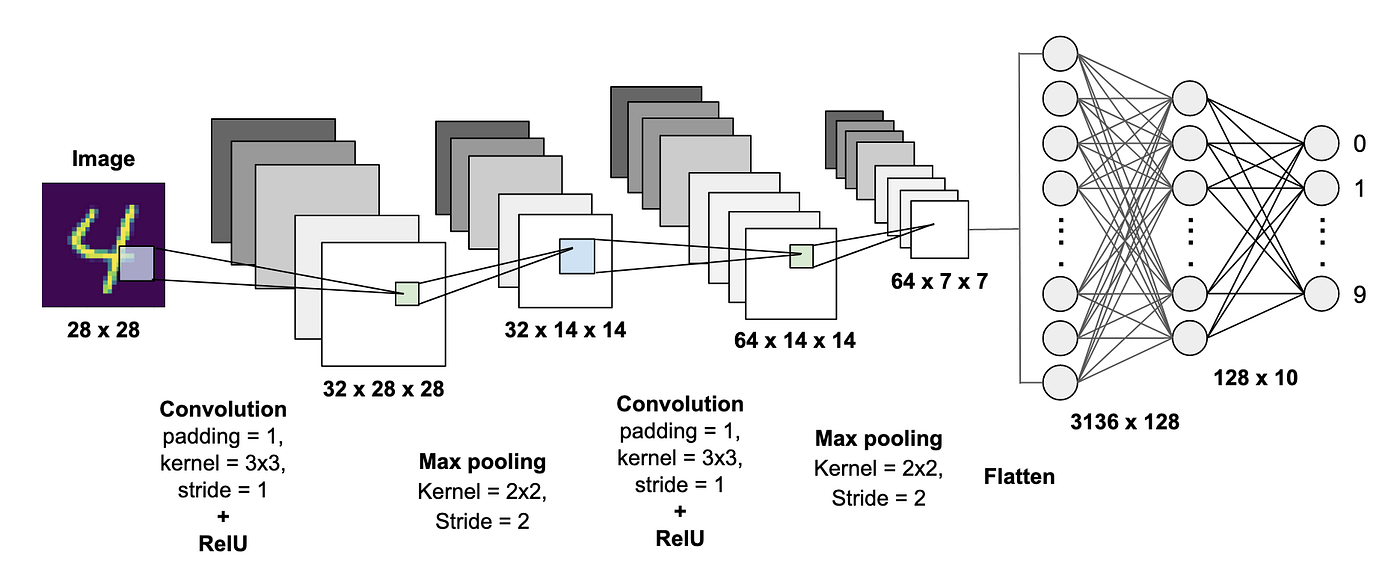

Dataset


Fashion-MNIST is a set of 28x28 grayscale images of clothes. In total, we have around 60,000 in
the training set and 10,000 in the test set.
It is associated with a label from  10 classes


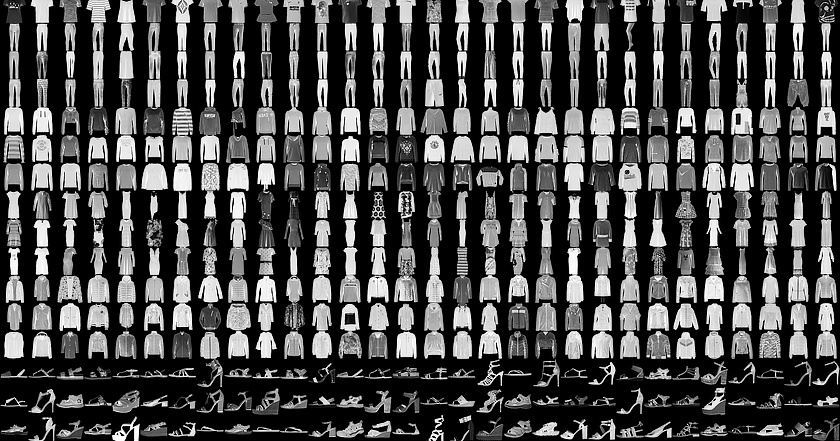

In [ ]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets
from torchvision import transforms
from torch import nn, optim

In [ ]:
print(torch.__version__)

2.0.1+cu118


Data Augmentation

Data augmentation is a technique of artificially increasing the training set by creating modified copies of a dataset using existing data.

Common techniques:
1. Image Flipping
2. Image Blur
3. Image Rotation

In [ ]:
from skimage import io as io
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from skimage.transform import rotate, AffineTransform, warp
from skimage.util import random_noise
from skimage.filters import gaussian
import matplotlib.pyplot as plt

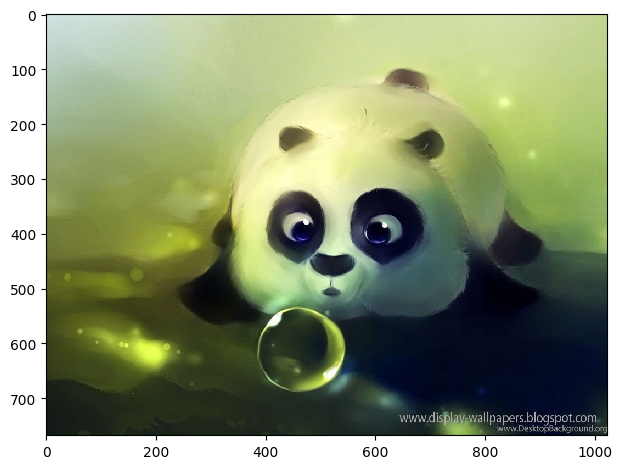

In [ ]:
img= io.imread('panda.jpg')
io.imshow(img)

# Rotating the image by 45 degrees

Rotated Image


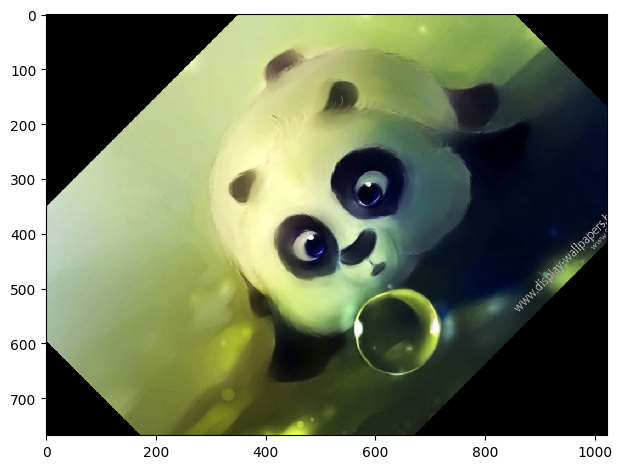

In [ ]:
print('Rotated Image')
rotated = rotate(img, angle=45)
io.imshow(rotated)

#Flip image left-to-right

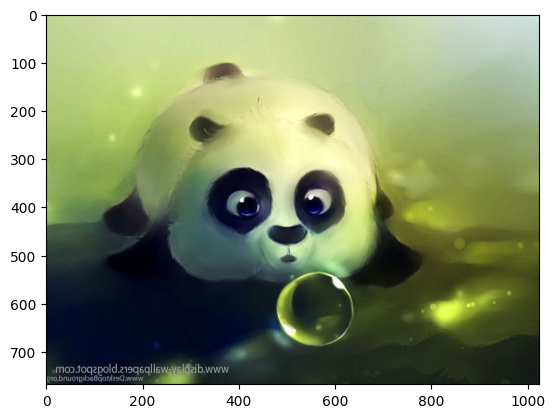

In [ ]:
flipL2R = np.fliplr(img)
plt.imshow(flipL2R)

#Blur the image

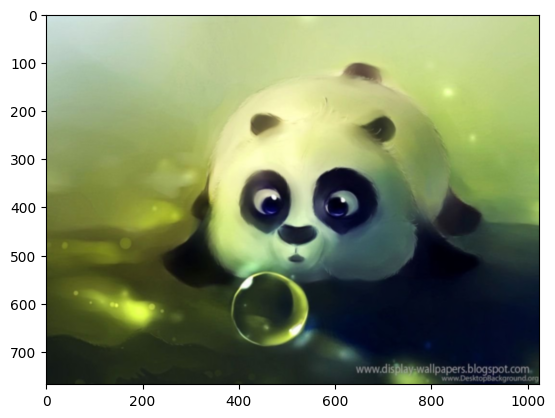

In [ ]:
blurred = gaussian(img, sigma=1,multichannel=True)
plt.imshow(blurred)

Transfroms are common image transformations

Transforms can be image Resize, converting an image tensor or the augmentation techniques we have seen above.

All transformations accept PIL image, Tensor Image or batch of Tensor Images as input


transforms.Compose is a utility function in PyTorch's torchvision.
transforms module that allows you to chain multiple transformations together into a single transformation pipeline.
It takes a list of transformations as input and returns a composed transformation.

#Data Preprocessing

#Pytorch Tensor

Tensors are  the basic data structure used by neural networks in Pytorch.

A PyTorch Tensor is conceptually identical to a numpy array,
a tensor is an n-dimensional array, and
PyTorch provides many functions for operating on these Tensors.
Behind the scenes, Tensors can keep track of a computational graph and gradients, but they're also useful as a generic tool for scientific computing.

Also unlike numpy, PyTorch Tensors can utilize GPUs to accelerate their numeric computations.
To run a PyTorch Tensor on GPU, you simply need to cast it to a new datatype.

In [ ]:
import PIL

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),
                                 transforms.RandomHorizontalFlip(p=50/100),
                                 transforms.RandomVerticalFlip(p=50/100),
                                 transforms.GaussianBlur(3,sigma=(0.1,2.0))])

#Defining the training and testing set

In [ ]:
trainset = datasets.FashionMNIST('./data',download=True,train=True, transform=transform)
testset = datasets.FashionMNIST("./",download=True,train=False, transform=transform)

100%|██████████| 26421880/26421880 [00:02<00:00, 12497982.38it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 213567.22it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3874795.81it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 6722377.64it/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 26421880/26421880 [00:02<00:00, 12560156.06it/s]


Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 209901.17it/s]


Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3925118.28it/s]


Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 21106820.13it/s]

Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw



In [ ]:
trainloader=torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)
testloader=torch.utils.data.DataLoader(testset,batch_size=64,shuffle=True)

In [ ]:
print(len(trainset))
len(testset)

60000


10000

#Visualizing the Training Images

In [ ]:
dataiter=iter(trainloader)
images,labels=dataiter.__next__()

print(images.shape)
print(labels.shape)


torch.Size([64, 1, 28, 28])
torch.Size([64])


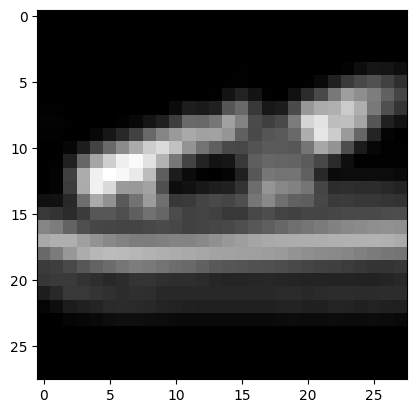

In [ ]:
plt.imshow(images[26].numpy().squeeze(),cmap='gray')

#PyTorch Model

 ## **Conv2d**

Applies Convolutions/filters on our image and outputs the feature map.

## **Batch Normalization**

We normalize the input layer by adjusting and scaling the activations. For example, when we have features from 0 to 1 and some from 1 to 1000, we should normalize them to speed up learning. If the input layer is benefiting from it, why not do the same thing also for the values in the hidden layers, that are changing all the time, and get 10 times or more improvement in the training speed.

Batch normalization reduces the amount by what the hidden unit values shift around.

## **RELU**
The rectified linear activation function or ReLU for short is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero. It has become the default activation function for many types of neural networks because a model that uses it is easier to train and often achieves better performance.

## **Max Pooling**

 The pooling layer serves to progressively reduce the spatial size of the representation, to reduce the number of parameters, memory footprint and amount of computation in the network, and hence to also control overfitting.


## **Forward Pass**
The **forward pass** refers to calculation process, values of the output layers from the inputs data. It's traversing through all neurons from first to last layer.

A loss function is calculated from the output values.

## **Backward Pass**

And then "backward pass" refers to process of counting changes in weights (de facto learning), using gradient descent algorithm (or similar). Computation is made from last layer, backward to the first layer.

Backward and forward pass makes together one "iteration".

During one iteration, you usually pass a subset of the data set, which is called "mini-batch"
(if you pass all data at once, it is called "batch")

**Epoch** means passing the entire data set. One epoch contains number_of_items/batch_size iterations

## **Defining our Neural Network**
In Pytorch, there are two requirements for defining the Net class of your model.

The first is writing an __init__ function that references nn.Module. This function is where you define the fully connected layers in your neural network.

Second, you just have to define the forward function, that will pass the data into the computation graph (i.e. our neural network). This will represent our feed-forward algorithm.

In [ ]:
class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()

    self.cnn_layers=nn.Sequential(
        nn.Conv2d(1,4,kernel_size=3,stride=1,padding=1),
        nn.BatchNorm2d(4),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2,stride=2),
        nn.Conv2d(4,4,kernel_size=3,stride=1,padding=1),
        nn.BatchNorm2d(4),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=2,stride=2)
    )

    self.linear_layers = nn.Sequential(
    nn.Linear(4*7*7,10)
    )

  def forward(self,x):
    x=self.cnn_layers(x)
    x=x.view(x.size(0),-1)
    x=self.linear_layers(x)
    return x

**Adam** is an optimization algorithm that can be used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data.

**Cross-entropy loss**, or log loss, measures the performance of a classification model whose output is a probability value between 0 and 1. Cross-entropy loss increases as the predicted probability diverges from the actual label. So predicting a probability of .012 when the actual observation label is 1 would be bad and result in a high loss value. A perfect model would have a log loss of 0.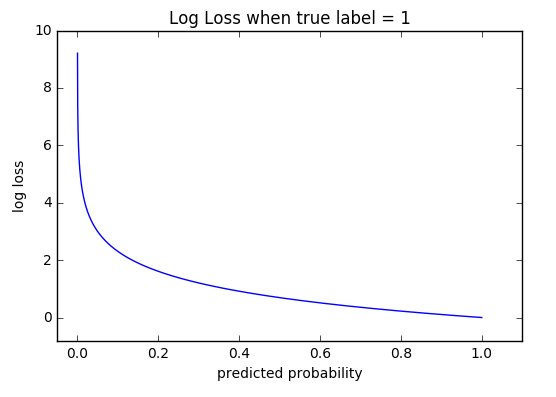

The NVIDIA CUDA® Deep Neural Network library (cuDNN) is a GPU-accelerated library of primitives for deep neural networks. cuDNN provides highly tuned implementations for standard routines such as forward and backward convolution, pooling, normalization, and activation layers.

In [ ]:
model=Net()
optimizer=optim.Adam(model.parameters(),lr=0.01)
criterion=nn.CrossEntropyLoss()

if torch.cuda.is_available():
  model = model.cuda()
  criterion=criterion.cuda()

  print(model)

Net(
  (cnn_layers): Sequential(
    (0): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(4, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_layers): Sequential(
    (0): Linear(in_features=196, out_features=10, bias=True)
  )
)


## Training

We simply have to loop over our data iterator, and feed the inputs to the network and optimize.

Epoch 1- Training Loss: 0.646300922404093
Epoch 2- Training Loss: 0.5149570548299279
Epoch 3- Training Loss: 0.4883701334248728
Epoch 4- Training Loss: 0.4793157592924165
Epoch 5- Training Loss: 0.46920489715233543
Epoch 6- Training Loss: 0.46090047571387116
Epoch 7- Training Loss: 0.4588158589595162
Epoch 8- Training Loss: 0.4531602150500456
Epoch 9- Training Loss: 0.4508482254009003
Epoch 10- Training Loss: 0.45342923975639


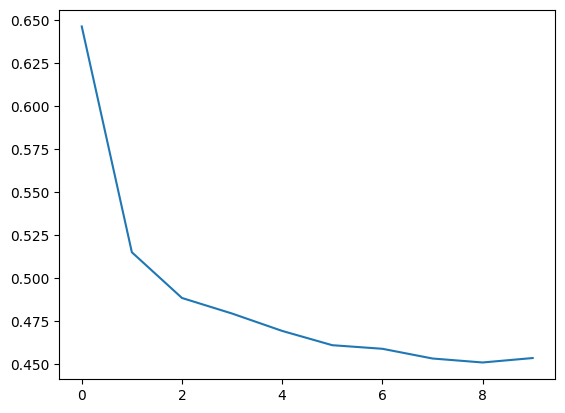

In [ ]:
loss_values =[]

for i in range(0,10):
  running_loss=0
  for images, labels in trainloader:
    if torch.cuda.is_available():
      images=images.cuda()
      labels=labels.cuda()

    optimizer.zero_grad()

    output=model(images)
    loss=criterion(output,labels)
    loss.backward()
    optimizer.step()
    running_loss+=loss.item()

  else:
    print("Epoch {}- Training Loss: {}".format(i+1,running_loss/len(trainloader)))
    loss_values.append(running_loss/len(trainloader))

#Plotting the loss
plt.plot(loss_values)

## Results

Getting Predictions on test set and measuring the performance

In [ ]:
correct_count,all_count=0,0
for images,labels in testloader:
  for i in range(len(labels)):
    if torch.cuda.is_available():
      images=images.cuda()
      labels=labels.cuda()

    img = images[i].view(1,1,28,28)
    with torch.no_grad():
      logps=model(img)

    ps = torch.exp(logps)
    probab=list(ps.cpu()[0])
    pred_label=probab.index(max(probab))
    true_label=labels.cpu()[i]

    if(true_label==pred_label):
      correct_count+=1

    all_count+=1

print("Number of Images Tested = ", all_count)
print("Model Accuracy = ", correct_count/all_count)


Number of Images Tested =  10000
Model Accuracy =  0.7822
